<h1 align=center><font size = 6>Building Neural Networks with Two Neurons and Hidden Layers From Scratch</font></h1>

<h1 align=center><font size = 4>Exponential Linear Unit</font></h1>

<img src="https://i.giphy.com/media/9N2UvCx7wXLnG/giphy.webp" height=400 width=900 alt="https://giphy.com/harvard/">

<small>Picture Source:<a href="https://giphy.com/harvard/">https://giphy.com/harvard/</a></small>

<br>

<h2>Introduction</h2>
<p>In this lab, we will build a neural network from scratch and code how it performs predictions using forward propagation. After doing forward propagation, we are going to use backpropagation. <i>Exponential Linear Unit (ELU)</i> is a function that tends to converge to zero faster and produce more accurate results. Unlike other activation functions, the <i>ELU</i> takes an extra alpha constant, which must be a positive number. <i>ELU</i> is very similiar to <i>ReLU</i> except negative inputs. They are both in identity function form for non-negative inputs. On the other hand, <i>ELU</i> becomes smooth slowly. Please note that all deep learning libraries have the entire training and prediction processes implemented.</p>

<br>

<h2>Objective:</h2>
<ol>
  <li>Build ELU function.</li>
  <li>Build <i>Artifical Neural Networks (ANNs)</i> from scratch.</li>
  <li>Calculate network output using forward propagation.</li>
  <li>Calculate <i>loss</i> between <i>ground truth</i> and estimated output.</li>
  <li>Update <i>weights</i> and <i>biases</i> throught <i>backpropagation</i>.</li>
  <li>Repeate the above three steps until number of iterations is reached or error between <i>ground truth</i> (<i>T</i>) and <i>predicted output</i> (<i>a<sub>2</sub></i>) is below a predefined threshold.</li>
</ol>

<br>

<h2>Keywords</h2>
<ul>
  <li>Computer Science</li>
  <li>Classification</li>
  <li>ELU Function</li>
  <li>Neural Networks</li>
  <li>Scratch</li>
</ul>

<br>

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="https://#import">Import Libraries</a></li>
<li><a href="https://#build_neural_network">Building Simple Neural Network</a></li>
<li><a href="https://#build_func">Building Function for Artificial Neural Network with ELU Function</a></li>
<li><a href="https://#build_func_with_grph">Building Function for Artificial Neural Network with ELU Function and Loss Graph</a></li>
<br>

<p></p>
Estimated Time Needed: <strong>15 min</strong>
</div>





<br>
<h2 align=center id="import">Import Libraries</h2>
<p>The following are the libraries we are going to use for this lab:</p>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
import seaborn as sns

In [2]:
!unzip -q images.zip

<br>
<h2 align=center id="build_neural_network">Building Simple Neural Network</h2>
<p>The following are the libraries we are going to use for this lab:</p>

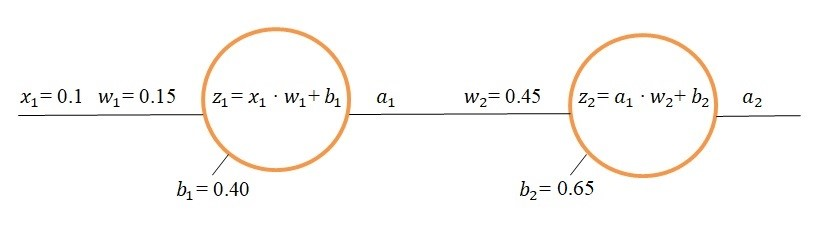

In [3]:
Image(filename='image_folder/back_prop_.jpg', width=900)

<br>
<h3>Creating parameters</h3>

In [4]:
weights = [0.15, 0.45]
biases = [0.40, 0.65]
T = 0.25 #@param {type:"number"}
lr = 0.4 #@param {type:"number"}
threshold = 0.001 #@param {type:"number"}
epochs = 300 #@param {type:"number"}

<p>Let's print the weights and biases</p>

In [5]:
print(weights)
print(biases)

[0.15, 0.45]
[0.4, 0.65]


<br>
<h3>Building ELU Function for the Neural Network</h3>

<h4>ELU function:</h4>

<br>

$$f(x) = 
\begin{cases}
  x & \text{for $x>0$} \\
  \alpha\cdot(e^{x}-1) & \text{for x$\le$0}
\end{cases}$$

In [6]:
def elu(alpha, x):
    if x > 0:
        return x
    else:
        return alpha * (np.exp(x) - 1)

<h4>Derivative of the ELU function:</h4>

<br>

$$f'(x) = 
\begin{cases}
  1 & \text{for $x>0$} \\
  \alpha \cdot e^{x} & \text{for x$<$0}
\end{cases}$$

In [7]:
def elu_prime(x, alpha):
    if x > 0:
        return 1
    else:
        return alpha * np.exp(x)

<h4>Weights</h4>

In [8]:
print(f'\nw\u2081: {weights[0]}') #  weight 1
print(f'w\u2082: {weights[1]}') #  weight 2


w₁: 0.15
w₂: 0.45


<h4>Biases</h4>

In [9]:
print(f'\nb\u2081: {biases[0]}') #  bias 1
print(f'b\u2082: {biases[1]}') #  bias 2


b₁: 0.4
b₂: 0.65


<p>Now that we have the weights and the biases defined for the network, let's compute the output for a given input x<sub>1</sub>.</p>

In [10]:
x_1 = 0.1
print(f"Input of our network: {x_1}")

Input of our network: 0.1


<br>
<h3>Calculate a<sub>2</sub> and Error</h3>

<p>Let's start by computing the wighted sum of the input, z<sub>1</sub> at the first node of the hidden layer.</p>

In [11]:
z_1 = x_1 * weights[0] + biases[0]

print('The weighted sum of the input at the first node in the first hidden layer is {}'.format(z_1))

The weighted sum of the input at the first node in the first hidden layer is 0.41500000000000004


<p>Using a ELU as the activation function.</p>

In [12]:
a_1 = elu(1, z_1)
a_1

0.41500000000000004

<p>Let's start computing the wighted sum of the input, z<sub>2</sub> at the first node of second hidden layer.</p>

In [13]:
z_2 = a_1 * weights[1] + biases[1]

print('The weighted sum of the input at the first node in second hidden layer is {}'.format(z_2))

The weighted sum of the input at the first node in second hidden layer is 0.8367500000000001


In [14]:
a_2 = elu(1, z_2)
print(f'Model predicted or estimated as {a_2}')

Model predicted or estimated as 0.8367500000000001


<p>Let's calculate error between predicted output (a<sub>2</sub>) and the ground truth (T).</p>

In [15]:
E = 1 / 2 * (T - a_2) ** 2
E

0.17213778125000007

<br>
<h3>Updating Weights and Biases</h3>

<br>
<h4>Updating w<sub>2</sub></h4>

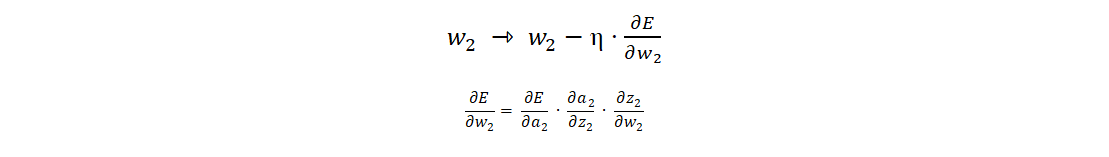

In [16]:
Image(filename='image_folder/update_w2.png')

In [17]:
weights[1] = weights[1] - lr * (-(T - a_2)) * elu_prime(1, a_2) * a_1

print(f'Updated w\u2082 value is {weights[1]}')

Updated w₂ value is 0.35259949999999995


<br>
<h4>Updating b<sub>2</sub></h4>

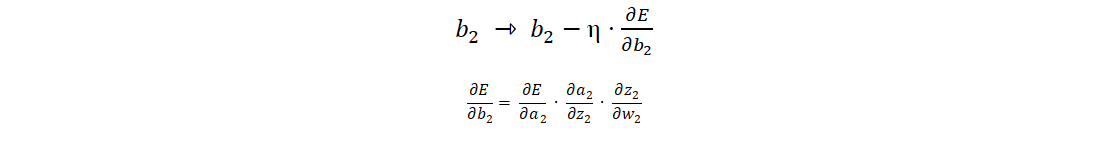

In [18]:
Image(filename='image_folder/update_b2.png')

In [19]:
biases[1] = biases[1] - lr * (-(T - a_2)) * elu_prime(1, a_2) * 1

print(f'Updated b\u2082 value is {biases[1]}')

Updated b₂ value is 0.4153


<br>
<h4>Updating w<sub>1</sub></h4>

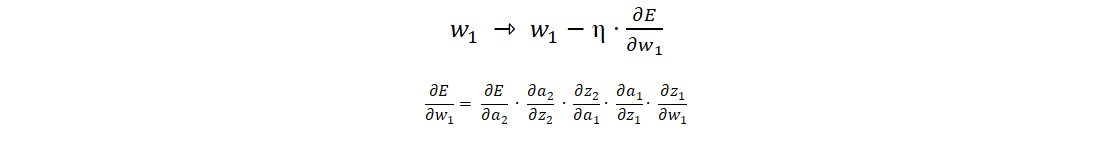

In [20]:
Image(filename='image_folder/update_w1.png')

In [21]:
weights[0] = weights[0] - lr * (-(T - a_2)) * elu_prime(1, a_2) * weights[1] * elu_prime(1, a_1) * x_1

print(f'Updated w\u2081 value is {weights[0]}')

Updated w₁ value is 0.141724489735


<br>
<h4>Updating b<sub>1</sub></h4>

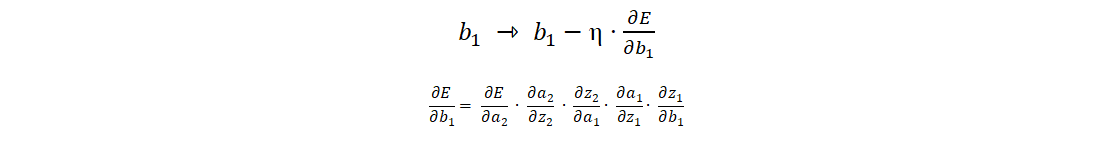

In [22]:
Image(filename='image_folder/update_b1.png')

In [23]:
biases[0] = biases[0] - lr * (-(T - a_2)) * elu_prime(1, a_2) * weights[1] * elu_prime(1, a_1) * 1

print(f'Updated b\u2081 value is {biases[0]}')

Updated b₁ value is 0.31724489735


<p>Let's print out our updated biases and weights:</p>

In [24]:
print(weights)
print(biases)
print(f'\nw\u2081: {weights[0]}') #  weight 1
print(f'w\u2082: {weights[1]}') #  weight 2
print(f'\nb\u2081: {biases[0]}') #  bias 1
print(f'b\u2082: {biases[1]}') #  bias 2

[0.141724489735, 0.35259949999999995]
[0.31724489735, 0.4153]

w₁: 0.141724489735
w₂: 0.35259949999999995

b₁: 0.31724489735
b₂: 0.4153


<br>
<h2 align=center id="build_func">Building Function for Artificial Neural Network with ELU Function</h2>

<p>At this stage, a function covering the processes and stages done so far has been created. You are completely free to make changes to the parameters.</p>

In [25]:
def forw_backProp(x_1, w_1, w_2, b_1, b_2, T, lr, treshold, epochs):
    
    i = 0
    while i < epochs:
        
        # Calculate z_1
        z_1 = x_1 * w_1 + b_1
        # Calculate a_1
        a_1 = elu(1, z_1)
        # Calculate z_2
        z_2 = a_1 * w_2 + b_2
        # Calculate a_2
        a_2 = elu(1, z_2)     
        # Calculate error between predicted value and the ground truth.
        E = 1 / 2 * (T - a_2) ** 2

        # Updating weights and biases
        w_2 = w_2 - lr * (-(T - a_2)) * elu_prime(1, a_2) * a_1
        b_2 = b_2 - lr * (-(T - a_2)) * elu_prime(1, a_2) * 1
        w_1 = w_1 - lr * (-(T - a_2)) * elu_prime(1, a_2) * w_2 * elu_prime(1, a_1) * x_1
        b_1 = b_1 - lr * (-(T - a_2)) * elu_prime(1, a_2) * w_2 * elu_prime(1, a_1) * 1        
        i+=1
        
        ## print(f'\nw\u2081: {w_1}') #  weight 1
        ## print(f'w\u2082: {w_2}') #  weight 2
        ## print(f'\nb\u2081: {b_1}') #  bias 1
        ## print(f'b\u2082: {b_2}') #  bias 2
        
        print(f'\nEpoch {i} - Error {E} - Output {a_2}')
        
    

In [26]:
forw_backProp(0.1, 0.15, 0.45, 0.4, 0.65, T, lr, threshold, epochs)


Epoch 1 - Error 0.17213778125000007 - Output 0.8367500000000001

Epoch 2 - Error 0.03980645296800739 - Output 0.5321575906049929

Epoch 3 - Error 0.010595771488016185 - Output 0.3955731533492092

Epoch 4 - Error 0.0029673815806231024 - Output 0.3270374140352998

Epoch 5 - Error 0.0008501432951880522 - Output 0.2912345315285151

Epoch 6 - Error 0.00024630069744826106 - Output 0.2721946253605805

Epoch 7 - Error 7.176908753766118e-05 - Output 0.26198074184161074

Epoch 8 - Error 2.097615159576403e-05 - Output 0.2564770597643937

Epoch 9 - Error 6.14068564251488e-06 - Output 0.2535044787465513

Epoch 10 - Error 1.7992249490730348e-06 - Output 0.2518969580644142

Epoch 11 - Error 5.274212957225791e-07 - Output 0.2510270553010647

Epoch 12 - Error 1.5464641837764154e-07 - Output 0.2505561410223633

Epoch 13 - Error 4.5350447181383615e-08 - Output 0.25030116589176526

Epoch 14 - Error 1.3300117712330756e-08 - Output 0.250163095786042

Epoch 15 - Error 3.9007384349262156e-09 - Output 0.25008

<br>
<h2 align=center id="build_func_with_grph">Building Function for Artificial Neural Network with ELU Function and Loss Graph</h2>


In [27]:
def prop_Visual(x_1, w_1, w_2, b_1, b_2, T, lr, treshold, epochs):
    
  def elu(alpha, x):
    if x > 0:
        return x
    else:
        return alpha * (np.exp(x) - 1)

  def elu_prime(x, alpha):
    if x > 0:
        return 1
    else:
        return alpha * np.exp(x)

  epoch=[]
  error=[]

  i = 0
  while i < epochs:
      
      # Calculate z_1
      z_1 = x_1 * w_1 + b_1
      # Calculate a_1
      a_1 = elu(1, z_1)
      # Calculate z_2
      z_2 = a_1 * w_2 + b_2
      # Calculate a_2
      a_2 = elu(1, z_2)      
      # Calculate error between predicted value and the ground truth.
      E = 1 / 2 * (T - a_2) ** 2

      # Updating weights and biases
      w_2 = w_2 - lr * (-(T - a_2)) * elu_prime(1, a_2) * a_1
      b_2 = b_2 - lr * (-(T - a_2)) * elu_prime(1, a_2) * 1
      w_1 = w_1 - lr * (-(T - a_2)) * elu_prime(1, a_2) * w_2 * elu_prime(1, a_1) * x_1
      b_1 = b_1 - lr * (-(T - a_2)) * elu_prime(1, a_2) * w_2 * elu_prime(1, a_1) * 1     
      error.append(E)
      epoch.append(i)        
      i+=1

  plt.figure(figsize=(20, 10))
  sns.set_style('whitegrid')
  plt.title('Loss Graph')
  plt.plot(epoch, error)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()


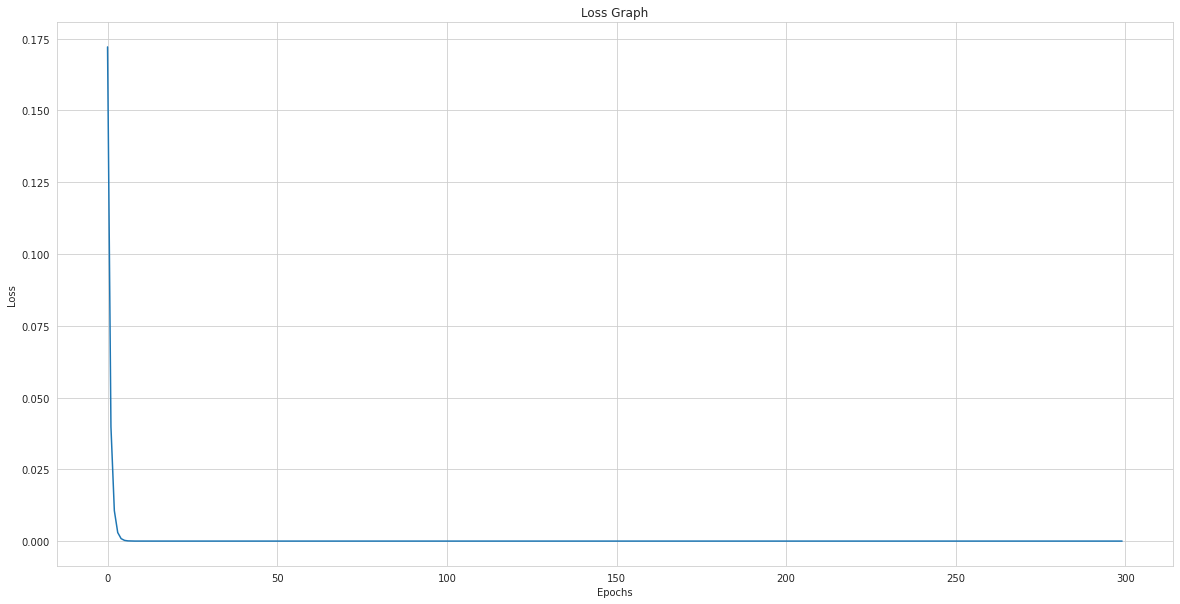

In [28]:
prop_Visual(0.1, 0.15, 0.45, 0.4, 0.65, T, lr, threshold, epochs)

<p>As we can see from the plot, our model working relatively great. 

Tips:</p>

<ol>
  <li>Small treshold : Slow convergence</li>
  <li>Large treshold : Our error may not decrease on every iteration; may not converge.</li>
  <li>Make sure that you are using treshold like <i>0.001</i>, <i>0.01</i>, <i>0.1</i> and etc.</li>
</ol>

<br>

<h1>Contact Me</h1>
<p>If you have something to say to me please contact me:</p>

<ul>
  <li>Twitter: <a href="https://twitter.com/Doguilmak">Doguilmak</a></li>
  <li>Mail address: doguilmak@gmail.com</li>
</ul>

In [30]:
from datetime import datetime
print(f"Changes have been made to the project on {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Changes have been made to the project on 2022-12-07 09:39:08
